# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import training
import torchvision
import model,utils
import load_data


## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


# Creating training and test Data using Data Loaders

In [ ]:
train_loader,test_loader = load_data.cifar10_train_test_data()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Visualization

let's have a look at some of the images the CIFAR10 data set

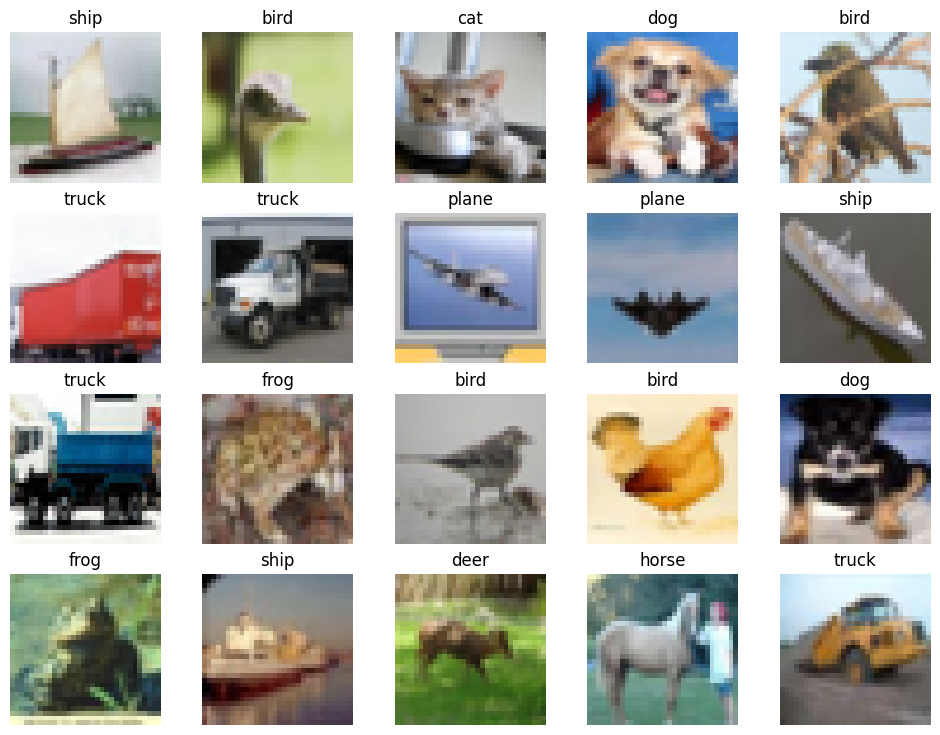

In [ ]:
# functions to show an image

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



cols = 5
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))
counter= 0
rnd_idx = list(range(20))
for x in range(rows):
  for y in range(cols):
    axs[x, y].set_title(classes[labels[rnd_idx[counter]]])
    axs[x, y].imshow(utils.imshow_(images[counter]))
    axs[x, y].set_axis_off()
    counter+=1


plt.show()



# Loading our CNN Model and Summarizing the Params

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.NetGroup().to(device)
summary(model, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
         Dropout2d-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]              64
         Dropout2d-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]              48
           Conv2d-10           [-1, 16, 32, 32]             512
        GroupNorm-11           [-1, 16, 32, 32]              32
        Dropout2d-12           [-1, 16, 32, 32]               0

# Let's Train and test our model

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
train_losses = []
train_acc = []
test_losses = []
test_acc = []
EPOCHS = 21
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss , train_accuracy = training.train(model, device, train_loader, optimizer, epoch)
    test_loss , test_accuracy = training.test(model, device, test_loader)
    train_losses.extend(train_loss),train_acc.extend(train_accuracy)
    test_losses.extend(test_loss),test_acc.extend(test_accuracy)

EPOCH: 0


Loss=1.6811243295669556 Batch_id=390 Accuracy=35.43: 100%|██████████| 391/391 [00:23<00:00, 16.95it/s]



Test set: Average loss: 1.4432, Accuracy: 4728/10000 (47.28%)

EPOCH: 1


Loss=1.2975714206695557 Batch_id=390 Accuracy=48.31: 100%|██████████| 391/391 [00:20<00:00, 18.94it/s]



Test set: Average loss: 1.2286, Accuracy: 5488/10000 (54.88%)

EPOCH: 2


Loss=1.4155181646347046 Batch_id=390 Accuracy=54.27: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]



Test set: Average loss: 1.1339, Accuracy: 5961/10000 (59.61%)

EPOCH: 3


Loss=0.9244340062141418 Batch_id=390 Accuracy=58.53: 100%|██████████| 391/391 [00:18<00:00, 21.01it/s]



Test set: Average loss: 1.0449, Accuracy: 6319/10000 (63.19%)

EPOCH: 4


Loss=1.031665563583374 Batch_id=390 Accuracy=61.84: 100%|██████████| 391/391 [00:19<00:00, 20.44it/s]



Test set: Average loss: 0.9498, Accuracy: 6645/10000 (66.45%)

EPOCH: 5


Loss=0.8576590418815613 Batch_id=390 Accuracy=64.08: 100%|██████████| 391/391 [00:18<00:00, 21.03it/s]



Test set: Average loss: 0.9483, Accuracy: 6702/10000 (67.02%)

EPOCH: 6


Loss=0.9422996640205383 Batch_id=390 Accuracy=66.02: 100%|██████████| 391/391 [00:20<00:00, 19.23it/s]



Test set: Average loss: 0.8706, Accuracy: 6948/10000 (69.48%)

EPOCH: 7


Loss=0.8987477421760559 Batch_id=390 Accuracy=67.29: 100%|██████████| 391/391 [00:19<00:00, 19.63it/s]



Test set: Average loss: 0.8240, Accuracy: 7093/10000 (70.93%)

EPOCH: 8


Loss=0.8499585390090942 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [00:18<00:00, 20.67it/s]



Test set: Average loss: 0.8155, Accuracy: 7156/10000 (71.56%)

EPOCH: 9


Loss=1.058375597000122 Batch_id=390 Accuracy=69.63: 100%|██████████| 391/391 [00:19<00:00, 20.16it/s]



Test set: Average loss: 0.7700, Accuracy: 7302/10000 (73.02%)

EPOCH: 10


Loss=0.8546875715255737 Batch_id=390 Accuracy=70.23: 100%|██████████| 391/391 [00:20<00:00, 19.18it/s]



Test set: Average loss: 0.7654, Accuracy: 7334/10000 (73.34%)

EPOCH: 11


Loss=0.9743156433105469 Batch_id=390 Accuracy=71.01: 100%|██████████| 391/391 [00:19<00:00, 20.43it/s]



Test set: Average loss: 0.7659, Accuracy: 7317/10000 (73.17%)

EPOCH: 12


Loss=0.8854777216911316 Batch_id=390 Accuracy=71.44: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]



Test set: Average loss: 0.7492, Accuracy: 7404/10000 (74.04%)

EPOCH: 13


Loss=0.7833379507064819 Batch_id=390 Accuracy=72.06: 100%|██████████| 391/391 [00:20<00:00, 18.79it/s]



Test set: Average loss: 0.7429, Accuracy: 7423/10000 (74.23%)

EPOCH: 14


Loss=0.8722786903381348 Batch_id=390 Accuracy=72.85: 100%|██████████| 391/391 [00:20<00:00, 19.46it/s]



Test set: Average loss: 0.7261, Accuracy: 7491/10000 (74.91%)

EPOCH: 15


Loss=0.7903239727020264 Batch_id=390 Accuracy=72.96: 100%|██████████| 391/391 [00:19<00:00, 20.09it/s]



Test set: Average loss: 0.7225, Accuracy: 7514/10000 (75.14%)

EPOCH: 16


Loss=0.7554829120635986 Batch_id=390 Accuracy=73.33: 100%|██████████| 391/391 [00:19<00:00, 20.31it/s]



Test set: Average loss: 0.7019, Accuracy: 7555/10000 (75.55%)

EPOCH: 17


Loss=0.574315071105957 Batch_id=390 Accuracy=73.83: 100%|██████████| 391/391 [00:19<00:00, 19.59it/s]



Test set: Average loss: 0.6996, Accuracy: 7546/10000 (75.46%)

EPOCH: 18


Loss=0.738695502281189 Batch_id=390 Accuracy=74.22: 100%|██████████| 391/391 [00:18<00:00, 21.01it/s]



Test set: Average loss: 0.6850, Accuracy: 7653/10000 (76.53%)

EPOCH: 19


Loss=0.7287036776542664 Batch_id=390 Accuracy=74.45: 100%|██████████| 391/391 [00:19<00:00, 20.26it/s]



Test set: Average loss: 0.6897, Accuracy: 7611/10000 (76.11%)

EPOCH: 20


Loss=0.7375346422195435 Batch_id=390 Accuracy=74.93: 100%|██████████| 391/391 [00:20<00:00, 18.88it/s]



Test set: Average loss: 0.6883, Accuracy: 7622/10000 (76.22%)



## Plotting the Training and Test Losses and accuracy

Text(0.5, 1.0, 'Test Accuracy')

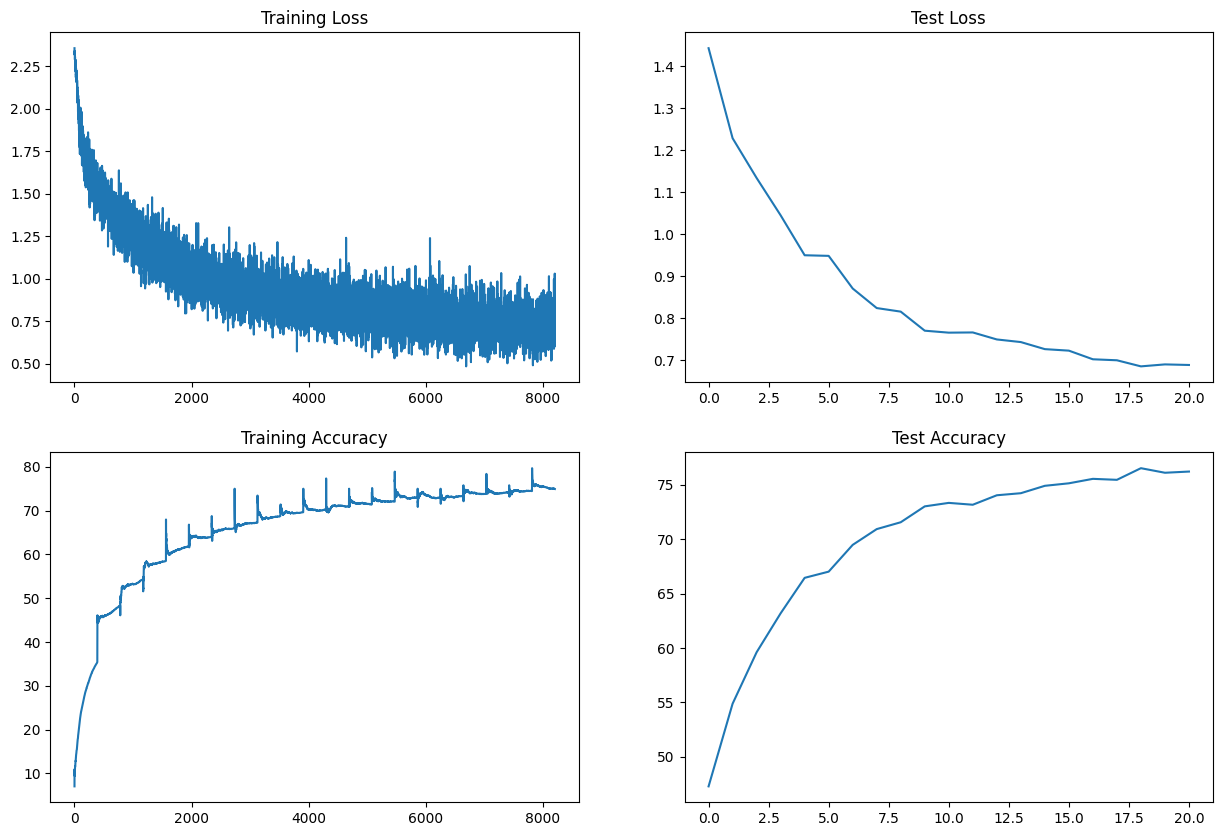

In [ ]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

### Missclassified Images

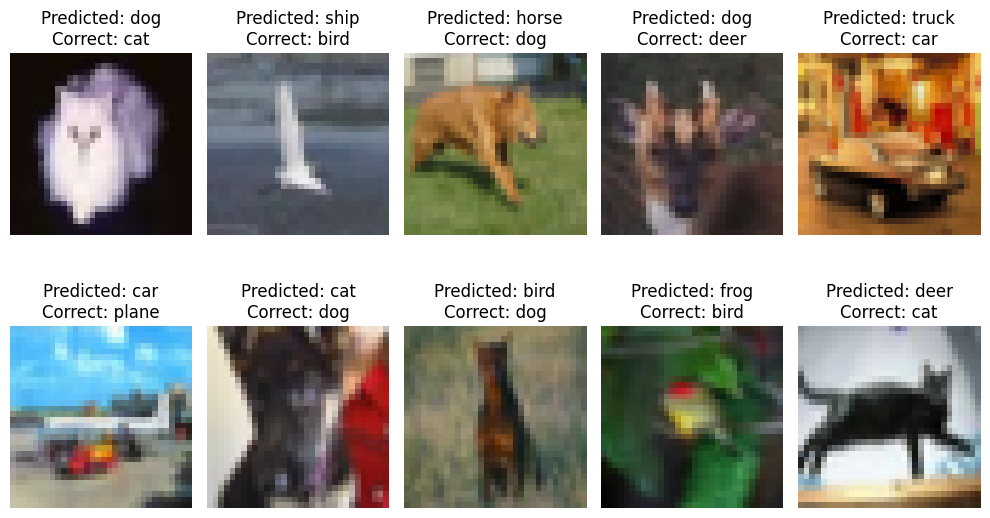

In [ ]:
utils.missclassified_plotting(model,device,test_loader)